# Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Congruential Generator

In [3]:
def lcg(a, b, M, seed, n):
    """
    Generate `n` uniform(0,1) pseudorandoms using integer LCG:
      X_{k+1} = (a * X_k + b) mod M
    Returns an array of length `n` with values X_k / M in [0, 1).
    """
    x = seed
    result = []
    for _ in range(n):
        x = (a * x + b) % M
        result.append(x / M)
    return np.array(result)

a, b, M = 16807, 0, 2**31 - 1
seed, n = 1, 10000
u = lcg(a, b, M, seed, n)
print(u)

[7.82636926e-06 1.31537788e-01 7.55605322e-01 ... 4.30814030e-01
 6.91407507e-01 4.85972532e-01]


## Histograms 10 bins

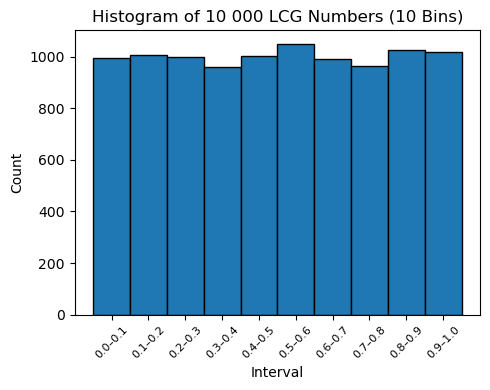

In [ ]:
# Define 10 bins on [0,1]:
bins = np.linspace(0, 1, 11)  # edges at 0.0, 0.1, 0.2, …, 1.0
counts = np.zeros(10, dtype=int)

# Assign each u[i] to a bin index 0..9
for val in u:
    idx = min(int(val * 10), 9)
    counts[idx] += 1

plt.figure(figsize=(5,4))
plt.bar(
    (bins[:-1] + bins[1:]) / 2,
    counts,
    width=0.1,
    edgecolor='black'
)
plt.title("Histogram of 10 000 LCG Numbers (10 Bins)")
plt.xlabel("Interval")
plt.ylabel("Count")
plt.xticks(
    np.linspace(0.05, 0.95, 10),
    [f"{i/10:.1f}–{(i+1)/10:.1f}" for i in range(10)],
    rotation=45,
    fontsize=8
)
plt.tight_layout()
plt.show()

## Scatter plot

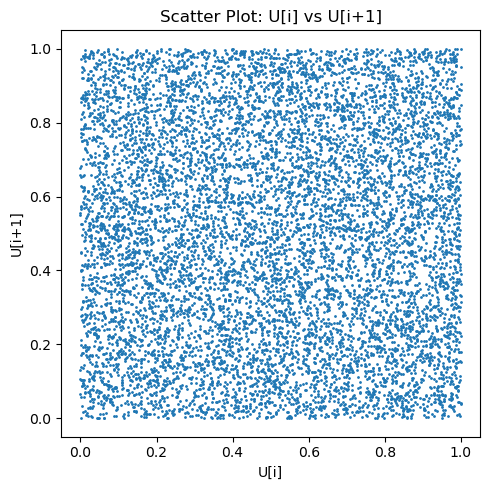

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(u[:-1], u[1:], s=1)
plt.title("Scatter Plot: U[i] vs U[i+1]")
plt.xlabel("U[i]")
plt.ylabel("U[i+1]")
plt.tight_layout()
plt.show()

## Statistical Tests (from Scratch)

Below we compute:

- Chi-Square Test (10 bins, 9 degrees of freedom).

- Kolmogorov–Smirnov (KS) Test (one‐sample test against Uniform[0,1]).

- Runs Test (counts runs above/below the median).

- Lag‐1 Autocorrelation.

In [ ]:
# 1. Chi-Square Test (10 bins)
expected = n / 10  # ideal count per bin
chi2_stat = np.sum((counts - expected)**2 / expected)
#   → Compare chi2_stat vs χ²_{0.05, df=9} = 16.919

# 2. Kolmogorov–Smirnov (KS) Test
u_sorted = np.sort(u)
i = np.arange(1, n + 1)
D_plus  = np.max(i/n - u_sorted)
D_minus = np.max(u_sorted - (i - 1)/n)
D       = max(D_plus, D_minus)
#   → Critical value ≈ 1.36 / sqrt(n) = 1.36 / 100 ≈ 0.0136

# 3. Runs Test (above/below median)
median = np.median(u)
# Label each point A if > median, else B
runs_seq = ['A' if x > median else 'B' for x in u]

runs = 1
for k in range(1, n):
    if runs_seq[k] != runs_seq[k - 1]:
        runs += 1

n1 = sum(x > median for x in u)  # # above median
n2 = n - n1                       # # below (or equal to) median
mu_runs = 1 + 2 * n1 * n2 / n
sigma_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1)))
Z_runs = (runs - mu_runs) / sigma_runs
#   → Compare |Z_runs| vs. z_{0.975} = 1.96 (two-sided)

# 4. Lag-1 Autocorrelation
h = 1
autocorr = np.corrcoef(u[:-h], u[h:])[0, 1]

# Collect everything into a summary table
import pandas as pd

results = pd.DataFrame({
    "Test": [
        "Chi-Square df", "χ² Statistic",
        "KS D Statistic", "KS D+  ", "KS D-  ",
        "Run Count", "Expected Runs", "σ(Runs)", "Z (Run Test)",
        "Lag-1 Autocorrelation"
    ],
    "Value": [
        "10 - 1 = 9",
        f"{chi2_stat:.4f}",
        f"{D:.6f}",
        f"{D_plus:.6f}",
        f"{D_minus:.6f}",
        f"{runs}",
        f"{mu_runs:.2f}",
        f"{sigma_runs:.4f}",
        f"{Z_runs:.4f}",
        f"{autocorr:.6f}"
    ]
})

results


,Test,Value
0,Chi-Square df,10 - 1 = 9
1,χ² Statistic,6.6900
2,KS D Statistic,0.007100
3,KS D+,0.001869
4,KS D-,0.007100
5,Run Count,4943
6,Expected Runs,5001.00
7,σ(Runs),49.9975
8,Z (Run Test),-1.1601
9,Lag-1 Autocorrelation,-0.000499


## Bad LCG

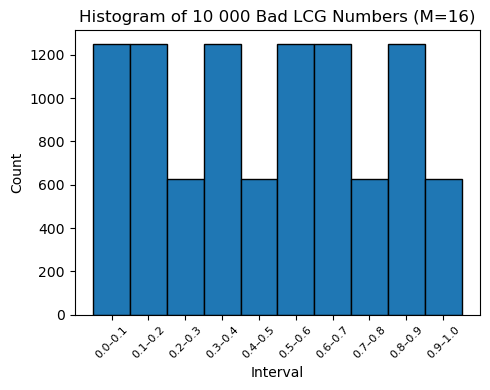

In [13]:
u_bad = lcg(5, 1, 16, 1, 10000)

bins = np.linspace(0, 1, 11)
counts_bad = np.zeros(10, dtype=int)
for val in u_bad:
    idx = min(int(val * 10), 9)
    counts_bad[idx] += 1

plt.figure(figsize=(5,4))
plt.bar((bins[:-1] + bins[1:]) / 2, counts_bad, width=0.1, edgecolor='black')
plt.title("Histogram of 10 000 Bad LCG Numbers (M=16)")
plt.xlabel("Interval")
plt.ylabel("Count")
plt.xticks(
    np.linspace(0.05, 0.95, 10),
    [f"{i/10:.1f}–{(i+1)/10:.1f}" for i in range(10)],
    rotation=45, fontsize=8
)
plt.tight_layout()
plt.show()

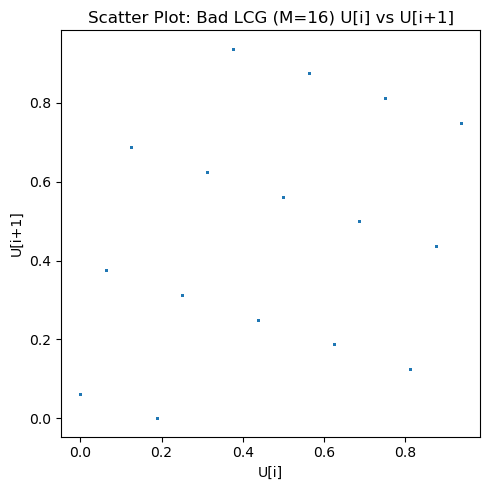

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(u_bad[:-1], u_bad[1:], s=1)
plt.title("Scatter Plot: Bad LCG (M=16) U[i] vs U[i+1]")
plt.xlabel("U[i]")
plt.ylabel("U[i+1]")
plt.tight_layout()
plt.show()

## Use the System Generator

In [9]:
import random

# Generate 10 000 uniforms via Python's random module
u_sys = np.array([random.random() for _ in range(10000)])

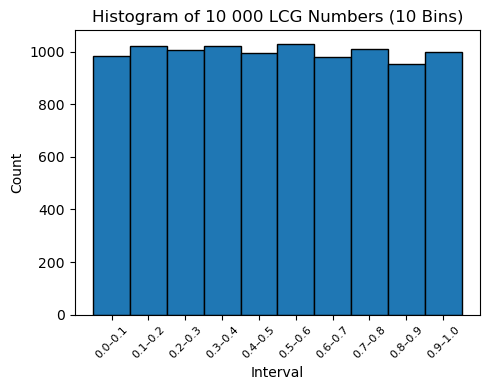

In [10]:
# Define 10 bins on [0,1]:
bins = np.linspace(0, 1, 11)  # edges at 0.0, 0.1, 0.2, …, 1.0
counts = np.zeros(10, dtype=int)

# Assign each u[i] to a bin index 0..9
for val in u_sys:
    idx = min(int(val * 10), 9)
    counts[idx] += 1

plt.figure(figsize=(5,4))
plt.bar(
    (bins[:-1] + bins[1:]) / 2,
    counts,
    width=0.1,
    edgecolor='black'
)
plt.title("Histogram of 10 000 LCG Numbers (10 Bins)")
plt.xlabel("Interval")
plt.ylabel("Count")
plt.xticks(
    np.linspace(0.05, 0.95, 10),
    [f"{i/10:.1f}–{(i+1)/10:.1f}" for i in range(10)],
    rotation=45,
    fontsize=8
)
plt.tight_layout()
plt.show()

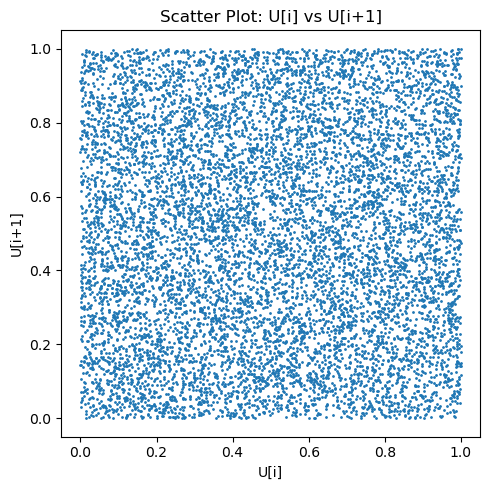

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(u_sys[:-1], u_sys[1:], s=1)
plt.title("Scatter Plot: U[i] vs U[i+1]")
plt.xlabel("U[i]")
plt.ylabel("U[i+1]")
plt.tight_layout()
plt.show()

In [12]:
# 1. Chi-Square Test (10 bins)
expected = n / 10  # ideal count per bin
chi2_stat = np.sum((counts - expected)**2 / expected)
#   → Compare chi2_stat vs χ²_{0.05, df=9} = 16.919

# 2. Kolmogorov–Smirnov (KS) Test
u_sorted = np.sort(u_sys)
i = np.arange(1, n + 1)
D_plus  = np.max(i/n - u_sorted)
D_minus = np.max(u_sorted - (i - 1)/n)
D       = max(D_plus, D_minus)
#   → Critical value ≈ 1.36 / sqrt(n) = 1.36 / 100 ≈ 0.0136

# 3. Runs Test (above/below median)
median = np.median(u_sys)
# Label each point A if > median, else B
runs_seq = ['A' if x > median else 'B' for x in u_sys]

runs = 1
for k in range(1, n):
    if runs_seq[k] != runs_seq[k - 1]:
        runs += 1

n1 = sum(x > median for x in u_sys)  # # above median
n2 = n - n1                       # # below (or equal to) median
mu_runs = 1 + 2 * n1 * n2 / n
sigma_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1)))
Z_runs = (runs - mu_runs) / sigma_runs
#   → Compare |Z_runs| vs. z_{0.975} = 1.96 (two-sided)

# 4. Lag-1 Autocorrelation
h = 1
autocorr = np.corrcoef(u_sys[:-h], u_sys[h:])[0, 1]

results = pd.DataFrame({
    "Test": [
        "Chi-Square df", "χ² Statistic",
        "KS D Statistic", "KS D+  ", "KS D-  ",
        "Run Count", "Expected Runs", "σ(Runs)", "Z (Run Test)",
        "Lag-1 Autocorrelation"
    ],
    "Value": [
        "10 - 1 = 9",
        f"{chi2_stat:.4f}",
        f"{D:.6f}",
        f"{D_plus:.6f}",
        f"{D_minus:.6f}",
        f"{runs}",
        f"{mu_runs:.2f}",
        f"{sigma_runs:.4f}",
        f"{Z_runs:.4f}",
        f"{autocorr:.6f}"
    ]
})

results


,Test,Value
0,Chi-Square df,10 - 1 = 9
1,χ² Statistic,4.7080
2,KS D Statistic,0.007276
3,KS D+,0.007276
4,KS D-,0.004082
5,Run Count,4971
6,Expected Runs,5001.00
7,σ(Runs),49.9975
8,Z (Run Test),-0.6000
9,Lag-1 Autocorrelation,0.018577
